In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('taxi.csv')

# **1. Velocity vs. Distance**

- Create a plot of the velocity (measured in miles per hour) versus the distance of the trip. 

- In a city, velocity is typically higher for longer trips. This is because longer trips often involve moving over long distances on highways and other fast roadways, while short trips usually do not.


In [2]:
dropoff = df['tpep_dropoff_datetime'].astype('datetime64')
pickup = df['tpep_pickup_datetime'].astype('datetime64')
duration = (dropoff-pickup).dt.total_seconds()

In [12]:
rounded_td = df['trip_distance'].round(0) #roudned to nearest mile
rounded_td.name = 'rounded_trip_distance'
duration.name = 'duration'
df_1a = pd.concat([df['trip_distance'], rounded_td, duration], axis=1)
df_1a.head()

,trip_distance,rounded_trip_distance,duration
0,1.03,1.0,541.0
1,1.03,1.0,342.0
2,5.63,6.0,26793.0
3,0.60,1.0,303.0
4,2.80,3.0,1189.0


In [13]:
avg_td = df_1a.groupby('rounded_trip_distance')['trip_distance'].mean()
avg_d = df_1a.groupby('rounded_trip_distance')['duration'].mean()
velocity = avg_td/(avg_d/3600)

avg_td.name = 'average_trip_distance'
avg_d.name = 'average_duration'
velocity.name = 'velocity'

df_b = pd.concat([avg_td, avg_d, velocity], axis=1)
df_b.head()

,average_trip_distance,average_duration,velocity
rounded_trip_distance,,,
0.0,0.351767,192.553173,6.576679
1.0,0.993746,430.085710,8.318073
2.0,1.924198,728.997786,9.502243
3.0,2.956488,996.332741,10.682532
4.0,3.942914,1173.044166,12.100558


Text(0, 0.5, 'Velocity (mi/h)')

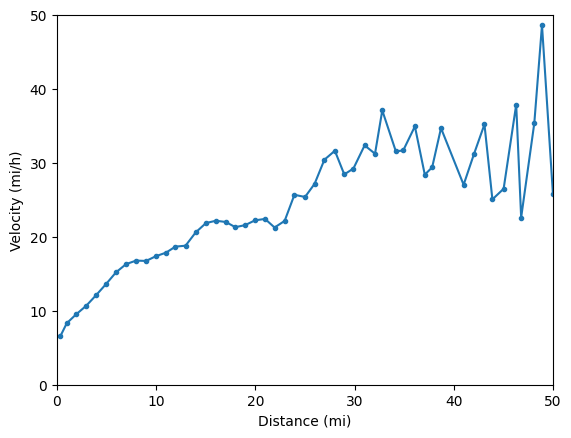

In [14]:
avg_td = df_1a.groupby(['rounded_trip_distance'])["trip_distance"].mean()
avg_d = df_1a.groupby(['rounded_trip_distance'])["duration"].mean()

velocity =avg_td/(avg_d/3600) #miles per hour

avg_td.name = 'average_trip_distance'
avg_d.name = 'average_duration'
velocity.name = 'velocity'

df_1b = pd.concat([avg_td, avg_d, velocity], axis=1)
df_1b.head()

plt.plot(df_1b['average_trip_distance'],df_1b['velocity'], '.-')

plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel('Distance (mi)')
plt.ylabel('Velocity (mi/h)')


# **2. Aggregating Velocity**

Text(0, 0.5, 'Velocity (mi/h)')

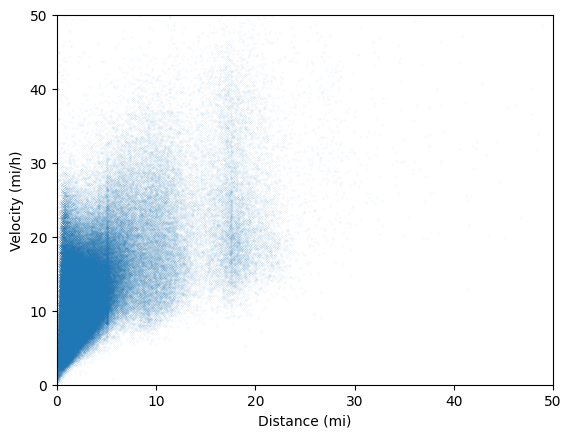

In [15]:
#1. copy 
df_2 = df_1a.copy()

df_2['velocity'] = df_2['trip_distance'] / (df_2['duration'] / 3600) #miles per hour

#2. define outlier 

outlier = (df_2['velocity'] >= 100)|(df_2['duration'] <= 0)
df_2a = df_2[~outlier].copy()

df_2a.head()

#3. velocity vs distance - using dots, markersize 0.05 

plt.plot(df_2a['trip_distance'],df_2a['velocity'],'.',markersize=.05)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel('Distance (mi)')
plt.ylabel('Velocity (mi/h)')


In [16]:
average_velocity1 = df_2a['velocity'].mean()
print("average_velocity 1 : "+ str(average_velocity1) )

average_velocity 1 : 11.653326218582565


In [17]:
average_velocity2 = (df_2a['trip_distance'].sum() / df_2a['duration'].sum()) * 3600 
print("average_velocity 2 : "+ str(average_velocity2) )

average_velocity 2 : 12.737689774177571


average_velocity1 : 11.182627798096464
average_velocity 2 : 10.600566565036798


# **3. Velocity vs. Hour of Day**

In [33]:
hour_of_day = df['tpep_dropoff_datetime'].astype('datetime64').dt.hour 
day_of_week = df['tpep_dropoff_datetime'].astype('datetime64').dt.dayofweek

dropoff = df['tpep_dropoff_datetime'].astype('datetime64')
pickup = df['tpep_pickup_datetime'].astype('datetime64')
duration = (dropoff-pickup).dt.total_seconds()/3600

hour_of_day.name = 'hour_of_day'
day_of_week.name = 'day_of_week'
duration.name = 'duration'


df3 = pd.concat([df['trip_distance'], hour_of_day, day_of_week, duration], axis=1)
df3.head()

,trip_distance,hour_of_day,day_of_week,duration
0,1.03,8,3,0.150278
1,1.03,8,3,0.095000
2,5.63,15,3,7.442500
3,0.60,18,4,0.084167
4,2.80,18,4,0.330278


In [34]:
# outlier
outlier = (df3['day_of_week']<5)&(df3['duration']<1)
df3 = df3[outlier].copy()

#Group by 
sum_td = df3.groupby('hour_of_day')['trip_distance'].sum()
sum_d = df3.groupby('hour_of_day')['duration'].sum()
velocity = sum_td/sum_d

Text(0, 0.5, 'Velocity (mi/h)')

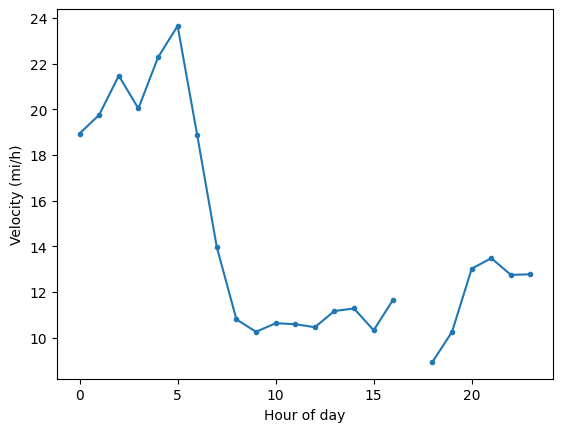

In [48]:
plt.plot(velocity,  '.-')
plt.xlabel('Hour of day')
plt.ylabel('Velocity (mi/h)')

Intrepretating the graph:

- The peak of the velocity is at 5 and after 20 might be because there are not a lot of cars at that time. From around 8, the velocity rapidly decreases because it is the usual time people go to work and school. During this time, there would be a lot of cars on the road so that the velocity drops. In the description at the top of the assignment, it is written that velocity is typically higher for longer trips. People might travel longer period in early morning or the late night times. During the usual day time, there would be more shorter trips so that the velocity is low.

# **4. Trip Counts by Borough**

For each borough, the number of trips that have a pickup in that borough. 

In [37]:
zones = pd.read_csv('taxi_zone_lookup.csv')

In [38]:
df4a = df.copy()

df4a = df4a.join(zones.set_index('LocationID'), on='PULocationID', how='left')
df4a = df4a.groupby(['Borough'])['Borough'].count().reset_index(name='number of trips')

In [39]:
df4a.head()

,Borough,number of trips
0,Bronx,430
1,Brooklyn,8144
2,EWR,33
3,Manhattan,339812
4,Queens,21472


For each borough, the number of trips that have a pickup in that borough and a dropoff in a different borough.

In [40]:
df4b = df.copy() 
df4b = df4b.join(zones.set_index('LocationID'), on='DOLocationID', how='left') #dropoff

df4b2 = df.copy()
df4b2 = df4b2.join(zones.set_index('LocationID'), on='PULocationID', how='left') #pickup

df4b['pickupBorough'] = df4b2['Borough']

df4b = df4b[(df4b['pickupBorough']!=df4b["Borough"])] #get the data that pickup and dropoff is idfferent
df4b = df4b.groupby(['pickupBorough'])['pickupBorough'].count().reset_index(name='number of trips')

df4b.head(7)

,pickupBorough,number of trips
0,Bronx,178
1,Brooklyn,2569
2,EWR,3
3,Manhattan,28097
4,Queens,14714
5,Staten Island,1
6,Unknown,1365


# **5. Travel Time Prediction**

- linear regression model that predicts the duration of the trip in minutes with an R2 of 0.7 or larger.

In [41]:
df3 = pd.read_csv('taxi.csv')

df3['dropoff'] = df3['tpep_dropoff_datetime'].astype('datetime64') 
df3['pickup'] = df3['tpep_pickup_datetime'].astype('datetime64')
df3['trip_minutes'] = (df3['dropoff']-df3['pickup']).dt.total_seconds()/60  #duration in minutes
df3['hour_of_day'] = df3['pickup'].dt.hour

In [42]:
#filter outliers
df3 = df3[(df3['trip_distance'] >= 0.01) & (df3['trip_distance'] <= 30)]
df3 = df3[(df3['trip_minutes'] >= 0.01) & (df3['trip_minutes'] <= 180)]
df3 = df3.filter(items=['trip_minutes', 'hour_of_day','trip_distance'])

#add columns 
df3['hour2'] = df3['hour_of_day'] **2
df3['velocity'] = df3['trip_distance'] / df3['trip_minutes'] # miles per minute
df3['velocity2'] = df3['velocity'] ** 2
df3['velocity3'] = df3['velocity'] ** 3
df3['distance2'] = df3['trip_distance'] ** 2

In [43]:
df3[['velocity','velocity2']]

,velocity,velocity2
0,0.114233,0.013049
1,0.180702,0.032653
3,0.118812,0.014116
4,0.141295,0.019964
5,0.098867,0.009775
...,...,...
2302082,0.302308,0.091390
2302083,0.283458,0.080348
2302084,0.271712,0.073827
2302085,0.136795,0.018713


In [44]:
df3.head()

,trip_minutes,hour_of_day,trip_distance,hour2,velocity,velocity2,velocity3,distance2
0,9.016667,7,1.03,49,0.114233,0.013049,0.001491,1.0609
1,5.700000,8,1.03,64,0.180702,0.032653,0.005900,1.0609
3,5.050000,17,0.60,289,0.118812,0.014116,0.001677,0.3600
4,19.816667,17,2.80,289,0.141295,0.019964,0.002821,7.8400
5,32.366667,17,3.20,289,0.098867,0.009775,0.000966,10.2400


In [51]:
X = df3[['velocity','velocity2','velocity3','trip_distance', 'distance2', 'hour_of_day', 'hour2']]
X = sm.add_constant(X) 
Y = df3['trip_minutes']

# fit a least squares model
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X)

r2 = r2_score(Y, Yhat)
print(r2)

0.7237869409016137
